<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras TF 2.0 - Code Along Classification Project

Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Data/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


----

## EDA

For classification problem, it's always a good idea to use CountPlot to see labels and their associated counts.

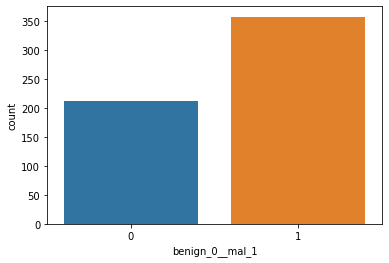

In [6]:
sns.countplot(x='benign_0__mal_1', data=df);

Let's check out the correlation between Featuers and Label.

In [7]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [8]:
df.corr()['benign_0__mal_1'].sort_values(ascending=False)

benign_0__mal_1            1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

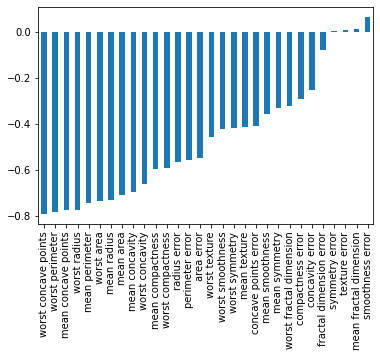

In [9]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar');

<AxesSubplot:>

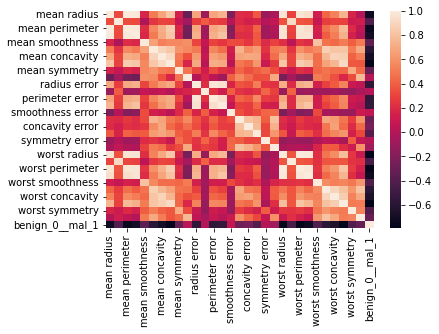

In [10]:
sns.heatmap(data=df.corr())

----------

## Train Test Split

In [11]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [14]:
X_train.shape, X_test.shape

((426, 30), (143, 30))


## Scaling Data

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
X_train = scaler.fit_transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [29]:
X_train.shape

(426, 30)

In [33]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))

# BINARY CLASSIFICATION
# For a binary classification problem
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [34]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

In [35]:
model.fit(x=X_train, y=y_train, 
          epochs=600, 
          validation_data=(X_test, y_test),
          verbose=1)

Epoch 1/600
14/14 [==============================] - 4s 22ms/step - loss: 0.6898 - val_loss: 0.6707
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6616 - val_loss: 0.6448
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6340 - val_loss: 0.6166
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6012 - val_loss: 0.5841
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5670 - val_loss: 0.5466
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5279 - val_loss: 0.5034
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4843 - val_loss: 0.4590
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4415 - val_loss: 0.4140
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3985 - val_loss: 0.3725
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3617 - val_loss: 0.3345
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0540 - val_loss: 0.1152
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0550 - val_loss: 0.1175
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0591 - val_loss: 0.1162
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0594 - val_loss: 0.1202
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0634 - val_loss: 0.1152
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0638 - val_loss: 0.1215
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0533 - val_loss: 0.1155
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0519 - val_loss: 0.1208
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0516 - val_loss: 0.1212
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0511 - val_loss: 0.1165
Epoch 93/600


14/14 [==============================] - 0s 4ms/step - loss: 0.0430 - val_loss: 0.1268
Epoch 165/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0432 - val_loss: 0.1335
Epoch 166/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0391 - val_loss: 0.1250
Epoch 167/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0403 - val_loss: 0.1335
Epoch 168/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0383 - val_loss: 0.1258
Epoch 169/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0376 - val_loss: 0.1355
Epoch 170/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0373 - val_loss: 0.1293
Epoch 171/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.1353
Epoch 172/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0371 - val_loss: 0.1304
Epoch 173/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0390 - val_loss: 0.1394
Epoc

14/14 [==============================] - 0s 7ms/step - loss: 0.0285 - val_loss: 0.1427
Epoch 246/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0273 - val_loss: 0.1407
Epoch 247/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0292 - val_loss: 0.1313
Epoch 248/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0306 - val_loss: 0.1375
Epoch 249/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0286 - val_loss: 0.1363
Epoch 250/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0281 - val_loss: 0.1368
Epoch 251/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0280 - val_loss: 0.1334
Epoch 252/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0266 - val_loss: 0.1420
Epoch 253/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0265 - val_loss: 0.1319
Epoch 254/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0264 - val_loss: 0.1350
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0208 - val_loss: 0.1559
Epoch 327/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0201 - val_loss: 0.1430
Epoch 328/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0192 - val_loss: 0.1524
Epoch 329/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0189 - val_loss: 0.1488
Epoch 330/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.1443
Epoch 331/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.1526
Epoch 332/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0190 - val_loss: 0.1497
Epoch 333/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0229 - val_loss: 0.1601
Epoch 334/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0216 - val_loss: 0.1403
Epoch 335/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0198 - val_loss: 0.1558
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0125 - val_loss: 0.1646
Epoch 408/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0136 - val_loss: 0.1653
Epoch 409/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0128 - val_loss: 0.1696
Epoch 410/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0136 - val_loss: 0.1537
Epoch 411/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0143 - val_loss: 0.1691
Epoch 412/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0140 - val_loss: 0.1766
Epoch 413/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0124 - val_loss: 0.1677
Epoch 414/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0118 - val_loss: 0.1656
Epoch 415/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0131 - val_loss: 0.1637
Epoch 416/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0122 - val_loss: 0.1662
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0077 - val_loss: 0.2012
Epoch 489/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0089 - val_loss: 0.1814
Epoch 490/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0107 - val_loss: 0.2077
Epoch 491/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0102 - val_loss: 0.1854
Epoch 492/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0098 - val_loss: 0.2071
Epoch 493/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0085 - val_loss: 0.2096
Epoch 494/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0089 - val_loss: 0.1835
Epoch 495/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0075 - val_loss: 0.2039
Epoch 496/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0079 - val_loss: 0.1925
Epoch 497/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0105 - val_loss: 0.1935
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0044 - val_loss: 0.2235
Epoch 570/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0056 - val_loss: 0.2500
Epoch 571/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0059 - val_loss: 0.2216
Epoch 572/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0054 - val_loss: 0.2320
Epoch 573/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0052 - val_loss: 0.2341
Epoch 574/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 0.2289
Epoch 575/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0044 - val_loss: 0.2429
Epoch 576/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0042 - val_loss: 0.2314
Epoch 577/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.2334
Epoch 578/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0042 - val_loss: 0.2420
Epoc

In [36]:
model_loss = pd.DataFrame(model.history.history)

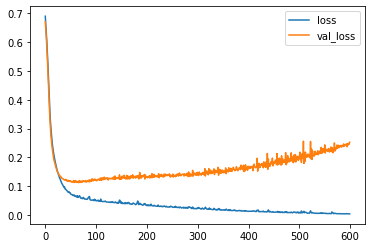

In [38]:
model_loss.plot();

**We can see from the above chart that loss is going down. However `val_loss` is going up which means we are overfitting.**
**Because we are training too much; in this case 600 epochs.**

---------------

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [39]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))

# Binary Classification
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
#help(EarlyStopping)

### Setting up `Early Stopping`
We have configure the following when setting up Early Stopping.
+ which metrics to `monitor` - in this case is `val_loss`
+ In which`mode`are we using to monitor for this metircs. It can be either `min`, `max`, `auto`. In this case, we want to reduce or minimize the validation loss. If our problem is monitoring accuracy, we should maximize for that case.
+ how `patience` are we when we face Early Stopping condition. How many epochs should we waiting before we trigger or define the situation as Early Stopping.

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [44]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=1)

In [46]:
model.fit(x=X_train, y=y_train,
             validation_data=(X_test, y_test),
             epochs=600,
             callbacks=[early_stop],
             verbose=1)

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.6743 - val_loss: 0.6634
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6426 - val_loss: 0.6364
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6094 - val_loss: 0.6023
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5727 - val_loss: 0.5631
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5355 - val_loss: 0.5233
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4970 - val_loss: 0.4815
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4562 - val_loss: 0.4403
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4186 - val_loss: 0.3992
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3813 - val_loss: 0.3609
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3464 - val_loss: 0.3271
Epoch 11

In [47]:
model_loss = pd.DataFrame(model.history.history)

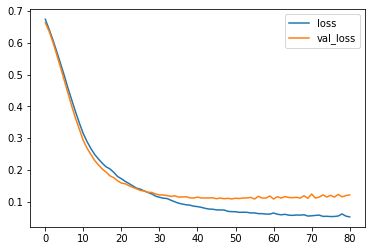

In [48]:
model_loss.plot();

---------

## Example Three: Adding in DropOut Layers

In [50]:
from tensorflow.keras.layers import Dropout

In [51]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dropout(0.5)) # common value is 0.2 - 0.5, half of the neurons (50%) from this layer will be turned off 

model.add(Dense(units=15, activation='relu'))
model.add(Dropout(0.5))

# Binary Classification
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [52]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25)

In [54]:
model.fit(x=X_train, y=y_train,
             validation_data=(X_test, y_test),
             epochs=600,
             callbacks=[early_stop],
             verbose=1)

Epoch 1/600
14/14 [==============================] - 1s 17ms/step - loss: 0.7158 - val_loss: 0.6944
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6919 - val_loss: 0.6750
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6799 - val_loss: 0.6604
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6624 - val_loss: 0.6436
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6353 - val_loss: 0.6180
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6187 - val_loss: 0.5902
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6061 - val_loss: 0.5602
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5822 - val_loss: 0.5273
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5348 - val_loss: 0.4897
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5125 - val_loss: 0.4565
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.1126 - val_loss: 0.0878
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1210 - val_loss: 0.0860
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1211 - val_loss: 0.0981
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0943 - val_loss: 0.0899
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1144 - val_loss: 0.0877
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1130 - val_loss: 0.0966
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1143 - val_loss: 0.0842
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1086 - val_loss: 0.0869
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1105 - val_loss: 0.0826
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1018 - val_loss: 0.1001
Epoch 93/600


In [56]:
model_loss = pd.DataFrame(model.history.history)

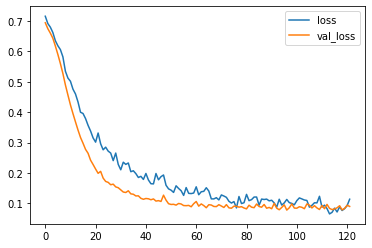

In [57]:
model_loss.plot();

This chart is better than previous twos. We can see both loss and validation_loss are quickly going down.

# Model Evaluation

In [66]:
predictions = (model.predict(X_test) > 0.5).astype('int32')

In [67]:
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [70]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 3 85]]
